In [56]:
import os
import io
import numpy
import random
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
from collections import Counter
from pandas import DataFrame
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 

In [57]:
def load_data(dir):
    list = []
    for file in os.listdir(dir):
         with open(dir + "/" + file, "rb") as f:
             body = f.read().decode("utf-8", errors="ignore").splitlines()
             list.append(' '.join(body))
    return list

def preprocess(text): 
    text = text.lower()
    return tokens


In [58]:
BASE_DATA_DIR="emails"
# load and tag data
ham = [(text, 'ham') for text in load_data(BASE_DATA_DIR + '/ham')]
spam = [(text, 'spam') for text in load_data(BASE_DATA_DIR + '/spam')]
allData = ham + spam

In [59]:
display(ham)


[('Subject: christmas tree farm pictures', 'ham'),
 ('Subject: vastar resources , inc . gary , production from the high island larger block a - 1 # 2 commenced on saturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and 10 , 000 gross for tomorrow . vastar owns 68 % of the gross production . george x 3 - 6992 - - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16 am - - - - - - - - - - - - - - - - - - - - - - - - - - - daren j farmer 12 / 10 / 99 10 : 38 am to : carlos j rodriguez / hou / ect @ ect cc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect subject : vastar resources , inc . carlos , please call linda and get everything set up . i \' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each following day based on my conversations with bill fischer at bmar . d . - - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 1

In [60]:
print(type(ham))
print(type(ham[0][0]))

<class 'list'>
<class 'str'>


In [61]:
def preprocess(text):
    text = text.lower()
    tokenizer = RegexpTokenizer(r'[a-z]+') 
    tokens=tokenizer.tokenize(text)
    lemmatizer = WordNetLemmatizer() 
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    stoplist = stopwords.words('english') 
    stoplist.append('subject')
    tokens = [t for t in tokens if not t in stoplist]
    return tokens

In [62]:
allData = [(preprocess(text), label) for (text,label) in allData]
display(allData)


[(['christmas', 'tree', 'farm', 'picture'], 'ham'),
 (['vastar',
   'resource',
   'inc',
   'gary',
   'production',
   'high',
   'island',
   'larger',
   'block',
   'commenced',
   'saturday',
   'p',
   'gross',
   'carlos',
   'expects',
   'gross',
   'tomorrow',
   'vastar',
   'owns',
   'gross',
   'production',
   'george',
   'x',
   'forwarded',
   'george',
   'weissman',
   'hou',
   'ect',
   'daren',
   'j',
   'farmer',
   'carlos',
   'j',
   'rodriguez',
   'hou',
   'ect',
   'ect',
   'cc',
   'george',
   'weissman',
   'hou',
   'ect',
   'ect',
   'melissa',
   'graf',
   'hou',
   'ect',
   'ect',
   'vastar',
   'resource',
   'inc',
   'carlos',
   'please',
   'call',
   'linda',
   'get',
   'everything',
   'set',
   'going',
   'estimate',
   'coming',
   'tomorrow',
   'increase',
   'following',
   'day',
   'based',
   'conversation',
   'bill',
   'fischer',
   'bmar',
   'forwarded',
   'daren',
   'j',
   'farmer',
   'hou',
   'ect',
   'enron',


In [63]:
random.shuffle(allData)
splitp = 0.80 # 80/20 split
train = allData[:int(splitp*len(allData))] 
test = allData[int(splitp*len(allData)):]
display(train)

[(['hpl',
   'nom',
   'february',
   'see',
   'attached',
   'file',
   'hplno',
   'xl',
   'hplno',
   'xl'],
  'ham'),
 (['tenaska',
   'iv',
   'pricing',
   'think',
   'need',
   'remove',
   'demand',
   'charge',
   'set',
   'williams',
   'apache',
   'williams',
   'deal',
   'demand',
   'charge',
   'need',
   'removed',
   'sept',
   'demand',
   'charge',
   'started',
   'october',
   'know',
   'time',
   'wa',
   'happening',
   'deal',
   'demand',
   'fee',
   'wa',
   'inadvertently',
   'paid',
   'williams',
   'sept',
   'need',
   'recoup',
   'money',
   'apache',
   'deal',
   'james',
   'think',
   'need',
   'remove',
   'demand',
   'charge',
   'completely',
   'say',
   'part',
   'deal',
   'apache',
   'billing',
   'u',
   'also',
   'need',
   'talk',
   'pricing',
   'deal',
   'williams',
   'apache',
   'billing',
   'u',
   'le',
   'sitara',
   'able',
   'keep',
   'desk',
   'zero',
   'jim',
   'pond',
   'doe',
   'want',
   'use',
   'pa

In [64]:
#PS: am not using the SpamDict and HamDict and am keeping this part just to have the spam token list
#and ham token list to use later in calculating the probability of each word in the emails
SpamDict = {} 
HamDict = {}
spam_token_list = []
ham_token_list = []
def featurizeTokens(tokens, is_spam): 
    for x in tokens :
        #print(x + ' ' + str(is_spam))
        if (is_spam):       
            spam_token_list.append(tokens)
            if x not in SpamDict:
                SpamDict[x]=0
            SpamDict[x] += 1
        else :
            ham_token_list.append(tokens)
            if x not in HamDict:
                HamDict[x]=0
            HamDict[x] += 1
            

    
for (tokens,label) in train: 
    featurizeTokens(tokens, label == 'spam')
display(SpamDict)


{'buy': 111,
 'viia': 1,
 'gra': 39,
 'try': 62,
 'revolutionary': 16,
 'product': 282,
 'ciiallis': 3,
 'soft': 100,
 'tab': 60,
 'new': 347,
 'improved': 18,
 'formula': 21,
 'make': 182,
 'even': 97,
 'better': 63,
 'cialis': 118,
 'impotence': 19,
 'treatment': 28,
 'drug': 106,
 'everyone': 32,
 'talking': 12,
 'act': 161,
 'hour': 121,
 'compare': 18,
 'two': 90,
 'three': 55,
 'viagra': 139,
 'action': 93,
 'active': 24,
 'ingredient': 19,
 'tadalafil': 21,
 'brand': 82,
 'simply': 37,
 'dissolve': 11,
 'half': 42,
 'pill': 299,
 'tongue': 23,
 'min': 27,
 'intercourse': 8,
 'best': 198,
 'erection': 42,
 'ever': 56,
 'also': 181,
 'le': 105,
 'sidebacks': 13,
 'drive': 57,
 'mix': 27,
 'alcohol': 16,
 'drink': 21,
 'prior': 56,
 'prescription': 118,
 'needed': 69,
 'worldwide': 57,
 'shipping': 80,
 'thousand': 90,
 'happy': 38,
 'customer': 136,
 'get': 387,
 'http': 803,
 'partied': 3,
 'net': 172,
 'c': 330,
 'ronn': 14,
 'world': 157,
 'rx': 46,
 'direct': 59,
 'bring': 25,

In [65]:
def tokenConditionalProbability(dataset):

    # Number of samples in dataset
    sampleSize = len(dataset)

    # Dictionary of token-probability pairs
    conditionalProbabilities = {}

    # Count probability of occurence of each token
    flatten = []
    flatten[len(flatten):] = [ token for sample in dataset for token in sample ]
    tokenCount = Counter(flatten)
    conditionalProbabilities = { key : value / sampleSize for key, value in tokenCount.items()}        

    return conditionalProbabilities

In [66]:
spamTokensConditionalProbabilities = tokenConditionalProbability(spam_token_list) # Dictionary
hamTokensConditionalProbabilities = tokenConditionalProbability(ham_token_list) # Dictionary
display(spamTokensConditionalProbabilities)
display(hamTokensConditionalProbabilities)

{'buy': 0.1470502247091699,
 'viia': 0.0007342992541423316,
 'gra': 0.019098579674868606,
 'try': 0.05043548025210941,
 'revolutionary': 0.029535147777724896,
 'product': 0.8449132778982723,
 'ciiallis': 0.002189299628091026,
 'soft': 0.121036993724461,
 'tab': 0.03381856009355516,
 'new': 0.743382807878759,
 'improved': 0.028936829866942255,
 'formula': 0.013496148328449337,
 'make': 0.44328558121825684,
 'even': 0.17247873591743212,
 'better': 0.054943261784483166,
 'cialis': 0.08686488213817065,
 'impotence': 0.01314259683571414,
 'treatment': 0.020941126877392423,
 'drug': 0.09154264034974402,
 'everyone': 0.031037741621849482,
 'talking': 0.00682626343665649,
 'act': 0.5632075279271684,
 'hour': 0.22523949714099226,
 'compare': 0.02068276232500901,
 'two': 0.23228333072702426,
 'three': 0.07682945899822545,
 'viagra': 0.13704879690506463,
 'action': 0.2741315891459692,
 'active': 0.025686875760645638,
 'ingredient': 0.0218318046763984,
 'tadalafil': 0.015318298329469196,
 'brand':

{'hpl': 0.7176722615880788,
 'nom': 0.19016062838892944,
 'february': 0.13478032282618077,
 'see': 0.4484804256220721,
 'attached': 0.41297660804946756,
 'file': 0.1848168114440861,
 'hplno': 0.007297723581063584,
 'xl': 0.1056522046187528,
 'tenaska': 0.16977016094226952,
 'iv': 0.12892644993212332,
 'pricing': 0.1076767343864027,
 'think': 0.2595792430769714,
 'need': 1.1005948037069297,
 'remove': 0.03236501173128683,
 'demand': 0.10596608520288456,
 'charge': 0.054081624645903464,
 'set': 0.33283112439872253,
 'williams': 0.06110077920855011,
 'apache': 0.04639155033467517,
 'deal': 2.0171182623570862,
 'removed': 0.015831351962146002,
 'sept': 0.04342930232193162,
 'started': 0.02564012021626372,
 'october': 0.17319538281660743,
 'know': 0.7915872156438083,
 'time': 0.6113569842353477,
 'wa': 1.0484200036096267,
 'happening': 0.015144738184357761,
 'fee': 0.1368166231157356,
 'inadvertently': 0.004723902791183094,
 'paid': 0.08646625391369854,
 'recoup': 0.0028602368229007275,
 'm

In [67]:
def spamPosteriorProbability(tokenList):
    spamTokenConditionalProbability = 1
    hamTokenConditionalProbability = 1
    for token in tokenList:
            
        if token not in spamTokensConditionalProbabilities:
            spamTokenConditionalProbability *= 0.01 # To minimize false positive,i did not use Laplace smoothing
        else:
            spamTokenConditionalProbability *= spamTokensConditionalProbabilities[token]
            
        if token not in hamTokensConditionalProbabilities:
            hamTokenConditionalProbability *= 0.01 # To mininize false negative,i did not use Laplace smoothing
        else:
            hamTokenConditionalProbability *= hamTokensConditionalProbabilities[token]    

    return 'spam' if spamTokenConditionalProbability>hamTokenConditionalProbability else 'ham'

In [68]:
test_output=[]
for tokens in test:
    test_output.append((tokens[0],spamPosteriorProbability(tokens[0])))
display(test_output)

[(['shell',
   'meter',
   'meter',
   'coming',
   'back',
   'effective',
   'today',
   'bringing',
   'unit',
   'back',
   'mary'],
  'ham'),
 (['contract',
   'status',
   'needed',
   'daren',
   'please',
   'forward',
   'suzanne',
   'calcagno',
   'sits',
   'near',
   'tks',
   'bob',
   'original',
   'message',
   'farmer',
   'daren',
   'j',
   'sent',
   'monday',
   'january',
   'superty',
   'robert',
   'contract',
   'status',
   'needed',
   'bob',
   'collecting',
   'hard',
   'copy',
   'e',
   'mail',
   'contract',
   'got',
   'guadalupe',
   'contract',
   'original',
   'message',
   'superty',
   'robert',
   'sent',
   'friday',
   'january',
   'kinsey',
   'lisa',
   'sullivan',
   'patti',
   'gay',
   'randall',
   'l',
   'lamadrid',
   'victor',
   'farmer',
   'daren',
   'j',
   'jaquet',
   'tammy',
   'calcagno',
   'suzanne',
   'contract',
   'status',
   'needed',
   'monday',
   'file',
   'transition',
   'plan',
   'louise',
   'kitchen'

In [69]:
truePositive = trueNegative = falsePositive = falseNegative = 0
for real, pred in zip(test, test_output):
    expected = real[1]
    found = pred[1]
    if expected == 'spam':
        if found=='ham':
            truePositive += 1
        else:
            falseNegative += 1
    elif expected == 'ham':
        if found=='spam':
            falsePositive += 1
        else:
            trueNegative += 1

print('{0} = {1}'.format('True Positive', truePositive))
print('{0} = {1}'.format('False Negative', falseNegative))
print('{0} = {1}'.format('False Positive', falsePositive))
print('{0} = {1}'.format('True Negative', trueNegative)) 

True Positive = 83
False Negative = 218
False Positive = 38
True Negative = 696


In [70]:
d = {'Tested Spam' : pd.Series([truePositive, falsePositive, truePositive + falsePositive], index=['Expected Spam','Expected Ham', 'Total'])}
df = pd.DataFrame(d)
df['Tested Ham'] = pd.Series([falseNegative, trueNegative, falseNegative + trueNegative], index=['Expected Spam','Expected Ham', 'Total'])
df['Total'] = pd.Series([truePositive + falseNegative, falsePositive + trueNegative, truePositive + falseNegative + falsePositive + trueNegative], index=['Expected Spam','Expected Ham', 'Total'])
print('                  Confusion Matrix')
print(df)
print()
print('Accuracy =', (truePositive + trueNegative)/len(test) * 100, '%')
print('Precision =', truePositive / (truePositive + falsePositive) * 100, '%')


                  Confusion Matrix
               Tested Spam  Tested Ham  Total
Expected Spam           83         218    301
Expected Ham            38         696    734
Total                  121         914   1035

Accuracy = 75.26570048309179 %
Precision = 68.59504132231406 %


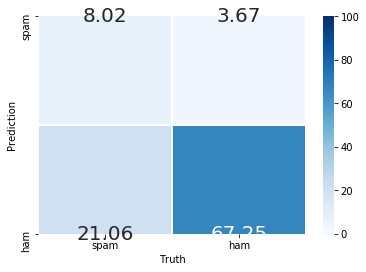

In [71]:
TruePosRate=truePositive/len(test)
FalsePosRate=falsePositive/len(test)
FalseNegRate=falseNegative/len(test)
TrueNegRate=trueNegative/len(test)
df = pd.DataFrame([[TruePosRate, FalsePosRate], [FalseNegRate, TrueNegRate]]) 
fig = plt.figure()
ax = sn.heatmap(100*df, vmin=0, vmax=100, cmap='Blues', annot=True, fmt='.2f', annot_kws={"size":20}, linewidths=0.5) 
ax.set_xlabel('Truth') 
ax.set_ylabel('Prediction') 
ax.set_xticklabels(['spam', 'ham']) 
ax.set_yticklabels(['spam', 'ham']) 
plt.show()
